**Métodos de Amostragem em Python**

Fonte: https://www.meccanismocomplesso.org/en/sampling-methods-in-python/

**- O que é amostragem?**

A amostragem é o processo de selecionar um subconjunto representativo de uma população maior para conduzir uma análise estatística ou pesquisa. Em vez de coletar dados de toda a população vamos selecionar uma amostra de indivíduos ou itens que refletem as características da população como um todo.

A amostragem é fundamental em estatísticas porque permite fazer inferências sobre a população maior sem a necessidade de coletar dados de todos os seus membros. No entanto, é importante que a amostra seja selecionada seja representativa para evitar vieses e garantir que as conclusões sejam válidas para toda a população.



**- Para garantir que uma amostra seja representativa da população, considere os seguintes pontos:**

*Método de Amostragem*: A amostra deve utilizar metodologia que permita a representatividade das características da população, utilizando métodos aleatórios, ou não aleatórios.

*Tamanho da Amostra*: A amostra deve ser grande o suficiente para capturar a variabilidade presente na população.

*Representatividade das Características*: A amostra deve refletir as principais características da população, como proporções de gênero ou outras variáveis demográficas importantes, por exemplo.

*Avaliação Estatística*: Usar análises estatísticas para avaliar se a amostra é representativa da população, comparando características demográficas, por exemplo, ou outras variáveis-chave.


#**Implementando Métodos de Amostragem em Python: Definição de uma População de Teste**

Para implementar métodos de amostragem em Python, primeiro precisamos criar uma população que simule uma real. Isso envolve gerar valores aleatórios que descrevam as características de cada elemento da população. Embora a população real deva ser grande, usaremos 100 indivíduos para simplificar o exemplo.


In [ ]:
import numpy as np
import pandas as pd

# Criação de uma população amostral usando distribuição normal
population = pd.DataFrame({
    'ID': range(1, 1000001),  # Identificadores únicos para os indivíduos
    'Age': np.random.normal(35, 5, size=1000000).astype(int),  # Idade com média 35 anos e desvio padrão de 10 anos
    'Gender': np.random.choice(['Male', 'Female'], size=1000000),  # Gênero aleatório
    'Income': np.random.randint(5000, 25000, size=1000000)  # Renda entre 5000 e 25000
})

population

,ID,Age,Gender,Income
0,1,31,Female,21137
1,2,35,Male,18088
2,3,25,Male,15278
3,4,43,Male,19111
4,5,35,Female,15238
...,...,...,...,...
999995,999996,42,Male,15220
999996,999997,44,Male,7566
999997,999998,40,Male,19982
999998,999999,37,Male,9337


A variável "population" é um DataFrame que representa uma população fictícia de um milhão de indivíduos, cada um com um identificador único, uma idade aleatória, com dados gerados a partir de uma distribuição normal, gênero aleatório e uma renda aleatória. Este é um exemplo resumido de uma população que pode ser usada para análise estatística ou simulação. Ao executar o código anterior, você obterá um DataFrame com 100 indivíduos diferentes, distribuídos uniformemente entre as idades possíveis (entre 18 e 70 anos) e com valores de renda distribuídos normalmente. Os valores variarão a cada execução do código.

**Visualizando o histograma**

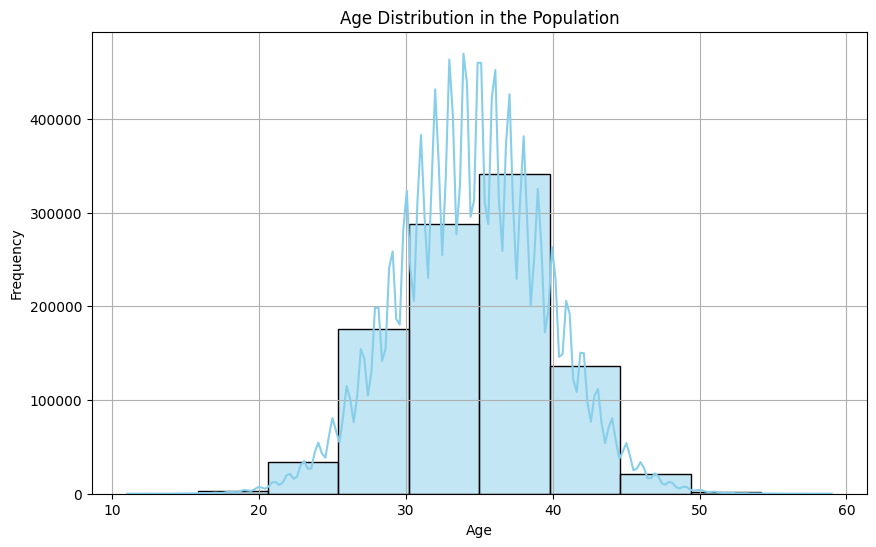

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando o histogram da variável "Age" (idade)
plt.figure(figsize=(10, 6))
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution in the Population')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A variável "Income", não foi gerada a partir de uma distribuição normal, veja a diferença no histograma:

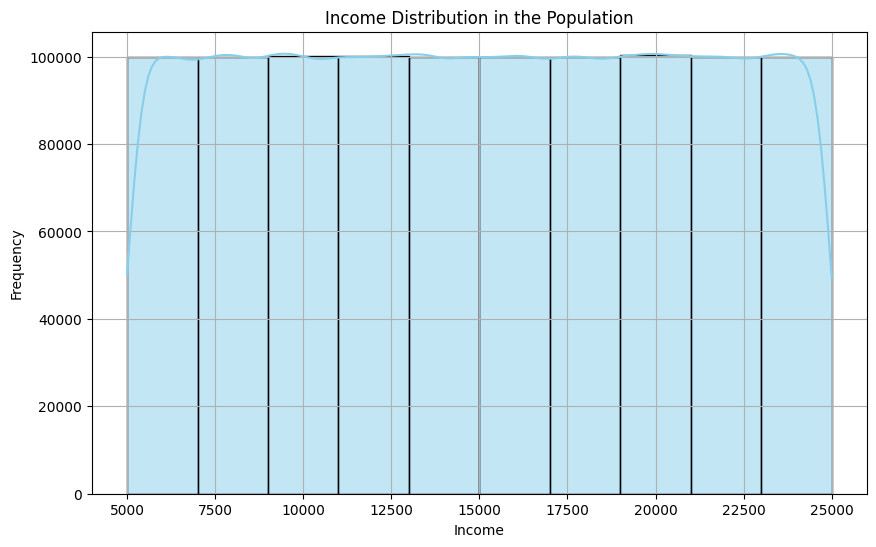

In [ ]:
# Visualizando o histogram da variável "Income" (renda)
plt.figure(figsize=(10, 6))
sns.histplot(population['Income'], bins=10, kde=True, color='skyblue')
plt.title('Income Distribution in the Population')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Realizando a análise estatística descritiva**

In [ ]:
from scipy.stats import skew, kurtosis

# Filtrando apenas colunas numéricas
numeric_df = population.select_dtypes(include=[np.number])

# Calculando estatísticas básicas
statistics_summary = numeric_df.describe().T

# Calculando estatísticas adicionais
statistics_summary['median'] = numeric_df.median()
statistics_summary['mode'] = numeric_df.mode().iloc[0]
statistics_summary['range'] = numeric_df.max() - numeric_df.min()
statistics_summary['cv'] = statistics_summary['std'] / statistics_summary['mean']  # Coeficiente de variação
statistics_summary['skewness'] = numeric_df.apply(lambda x: skew(x.dropna()))
statistics_summary['kurtosis'] = numeric_df.apply(lambda x: kurtosis(x.dropna()))
statistics_summary['sem'] = numeric_df.sem()  # Erro padrão da média

# Calculando quartis e intervalo interquartil
quartiles = numeric_df.quantile([0.25, 0.75])
statistics_summary['Q1'] = quartiles.loc[0.25]
statistics_summary['Q3'] = quartiles.loc[0.75]
statistics_summary['IQR'] = statistics_summary['Q3'] - statistics_summary['Q1']

# Visualizando o resumo das estatísticas
statistics_summary = statistics_summary[['count', 'mean', 'std', 'median', 'mode', 'min', 'max', 'range', 'Q1', 'Q3', 'IQR', 'cv', 'skewness', 'kurtosis', 'sem']]

# Formatando todas as colunas para exibir duas casas decimais
statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")

# Exibindo o resumo das estatísticas
statistics_summary

<ipython-input-5-ede88a39e6a4>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  statistics_summary = statistics_summary.applymap(lambda x: f"{x:.2f}")


,count,mean,std,median,mode,min,max,range,Q1,Q3,IQR,cv,skewness,kurtosis,sem
ID,1000000.00,500000.50,288675.28,500000.50,1.00,1.00,1000000.00,999999.00,250000.75,750000.25,499999.50,0.58,-0.00,-1.20,288.68
Age,1000000.00,34.50,5.01,34.00,35.00,11.00,59.00,48.00,31.00,38.00,7.00,0.15,0.00,0.01,0.01
Income,1000000.00,15002.73,5775.43,14996.00,8834.00,5000.00,24999.00,19999.00,10000.00,20017.00,10017.00,0.38,0.00,-1.20,5.78


#**Métodos de Amostragem**

Os métodos de amostragem são projetados para garantir que a amostra seja representativa da população de interesse, e a escolha do método depende da natureza da pesquisa,  recursos disponíveis e outros fatores relevantes.

Existem vários métodos de amostragem, e a escolha do método depende do objetivo do estudo e das características da população. Iremos utilizar os métodos de amostragem:

- Amostragem aleatória simples
- Amostragem sistemática
- Amostragem estratificada
- Amostragem por conglomerados
- Amostragem por cotas
- Amostragem por conveniência

##**Amostragem Aleatória Simples**

A amostragem aleatória simples é um dos métodos de amostragem mais simples e fundamentais em estatística. Consiste em selecionar aleatoriamente uma amostra de indivíduos da população sem qualquer tipo de estratificação ou subdivisão. Cada indivíduo na população tem a mesma probabilidade de ser selecionado para fazer parte da amostra. Esse método é amplamente utilizado porque é fácil de implementar e fornece uma estimativa não tendenciosa das características da população.

In [ ]:
# Amostragem Aleatória Simples
def amostragem_aleatoria_simples(population, n):
    """
    Seleciona aleatoriamente uma amostra de indivíduos da população.

    Parâmetros:
    populacao (DataFrame): A população da qual a amostra será retirada.
    n (int): O número de indivíduos a serem selecionados na amostra.

    Retorna:
    DataFrame: Uma amostra aleatória de n indivíduos da população.
    """
    return population.sample(n)

# Exemplo de uso da amostragem aleatória simples para selecionar 10 indivíduos
# Aqui 'populacao' é o DataFrame que contém os dados da população
amostra_aleatoria = amostragem_aleatoria_simples(population, 1000)
print("Amostragem Aleatória Simples:")
print(amostra_aleatoria)

Amostragem Aleatória Simples:
            ID  Age  Gender  Income
636141  636142   39    Male   20318
771257  771258   42  Female   12519
982742  982743   35  Female   21160
316044  316045   37    Male   19887
218331  218332   34  Female   18280
...        ...  ...     ...     ...
280831  280832   17    Male    6596
416675  416676   36    Male    7122
310869  310870   30    Male   20943
776678  776679   36  Female   24941
26885    26886   35  Female   23663

[1000 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos:**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,523242.25,292813.376296,28900.0,288018.50,505182.0,806807.25,995162.0
Age,100.0,37.40,10.389389,6.0,30.75,37.5,44.00,60.0
Income,100.0,15335.82,5957.689096,5182.0,9647.50,16471.5,20107.50,24876.0


In [ ]:
amostra_aleatoria.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,505219.032,289471.159904,1772.0,252188.5,519822.5,751162.00,999211.0
Age,1000.0,34.681,5.115996,17.0,31.0,35.0,38.00,51.0
Income,1000.0,15372.763,5830.177353,5111.0,10472.5,15092.5,20535.25,24952.0


**Visualizando os histogramas juntos**

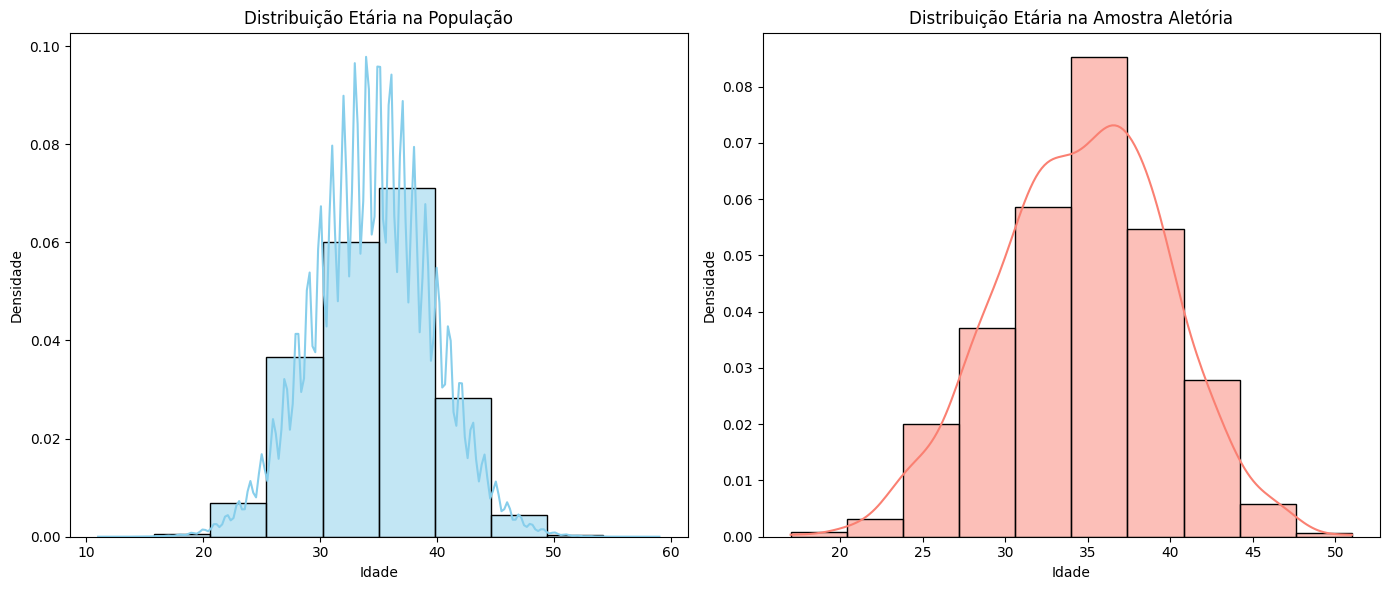

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'population' e 'systematic_sample' sejam seus DataFrames
# e as colunas 'Age' estejam definidas

# Configurações para o tamanho da figura
plt.figure(figsize=(14, 6))

# Plotando o histograma com curva de densidade para a coluna 'Age' do DataFrame 'population'
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue', edgecolor='black', stat='density')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Plotando o histograma com curva de densidade para a coluna 'Age' do DataFrame 'systematic_sample'
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
sns.histplot(amostra_aleatoria['Age'], bins=10, kde=True, color='salmon', edgecolor='black', stat='density')
plt.title('Distribuição Etária na Amostra Aletória')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

##**Amostragem estratificada**

Técnica de amostragem que divide a população em grupos homogêneos chamados “estratos” e, em seguida, seleciona uma amostra aleatória de cada um desses estratos. Esse método é utilizado quando a população possui heterogeneidade em algumas características-chave e o objetivo é garantir que a amostra reflita com precisão essa heterogeneidade.

Inicialmente, a população é dividida em grupos ou estratos homogêneos com base em uma característica ou variável de interesse. Por exemplo, se estamos estudando a renda dos indivíduos, podemos dividir a população em estratos com base em grupos de renda, como baixa, média e alta. Após definir os estratos, uma amostra aleatória é selecionada de cada um deles. É importante que a seleção das amostras dentro de cada estrato ocorra de forma aleatória, para garantir a representatividade da amostra geral. Uma vez que as amostras de cada estrato são selecionadas, elas são combinadas para formar a amostra estratificada geral.

A amostragem estratificada é útil quando a população apresenta variação significativa nas características de interesse e quando se deseja garantir que a amostra reflita com precisão essa diversidade. Ela é particularmente eficaz na redução da variância estimada e na melhoria da precisão das estimativas estatísticas em comparação com a amostragem aleatória simples, especialmente quando os estratos são homogêneos internamente, mas heterogêneos entre si.

Por exemplo, se estamos realizando um estudo sobre a satisfação no trabalho dos funcionários de uma empresa, podemos dividir a população em estratos com base no nível de senioridade (por exemplo, novos contratados, funcionários de longa data, gerentes) e, em seguida, selecionar uma amostra aleatória de cada um desses grupos para formar uma amostra estratificada.

No nosso exemplo iremos utilizar a idade como elemento para identificar os estratos.

In [ ]:
import pandas as pd

# Amostragem estratificada pela indade
def stratified_sampling(population, n, stratification):
    """
    Realiza a amostragem estratificada com base na idade.

    Parameters:
    population (DataFrame): O DataFrame contendo a população.
    n (int): O número total de indivíduos a serem selecionados.
    stratification (dict): Um dicionário onde as chaves são as idades (estratos) e os valores são as proporções de amostra para cada estrato.

    Retorna:
    DataFrame: Um DataFrame contendo a amostra estratificada.
    """
    sample = pd.DataFrame()   # DataFrame vazio para armazenar a amostra

    # Itera sobre cada estrato definido na estratificação
    for value, proportion in stratification.items():
        stratum = population[population['Age'] == value]  # Filtra a população pelo estrato atual

        # Verifica se o estrato contém indivíduos
        if stratum.empty:
            print(f"There are no individuals in the population with age {value}.")
            print("Please modify the population or change the age.")
            return sample

        # Verifica se há indivíduos suficientes para a amostra no estrato atual
        if len(stratum) < int(n * proportion):
            print(f"There are not enough individuals in the population with age {value}.")
            return sample
        else:
            # Seleciona uma amostra aleatória do estrato atual
            stratum_sample = stratum.sample(int(n * proportion))
            sample = pd.concat([sample, stratum_sample])  # Concatena a amostra do estrato com a amostra geral

    return sample

# Exemplo de uso da amostragem estratificada por idade para selecionar 10 indivíduos
age_stratification = {20: 0.2, 25: 0.3, 30: 0.2, 35: 0.1, 40: 0.2}  # Proporções para cada estrato de idade
stratified_age_sample = stratified_sampling(population, 100, age_stratification)

print("\nAmostragem Estratificada por Idade:")
print(stratified_age_sample)


Amostragem Estratificada por Idade:
            ID  Age  Gender  Income
590830  590831   20  Female    9329
911787  911788   20  Female   18041
731144  731145   20    Male   17630
47627    47628   20  Female   15972
439548  439549   20    Male   14528
...        ...  ...     ...     ...
949499  949500   40  Female   12861
876206  876207   40  Female   19901
493172  493173   40    Male   19742
159387  159388   40    Male   14943
118415  118416   40    Male   11817

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra:**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
stratified_age_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,559572.00,280013.078224,10439.0,342540.25,599874.0,798157.00,997315.0
Age,100.0,39.50,13.380598,20.0,35.00,37.5,50.00,60.0
Income,100.0,14499.05,5804.851079,5199.0,9114.25,13664.5,18811.25,24852.0


**Visualizando os histogramas juntos:**

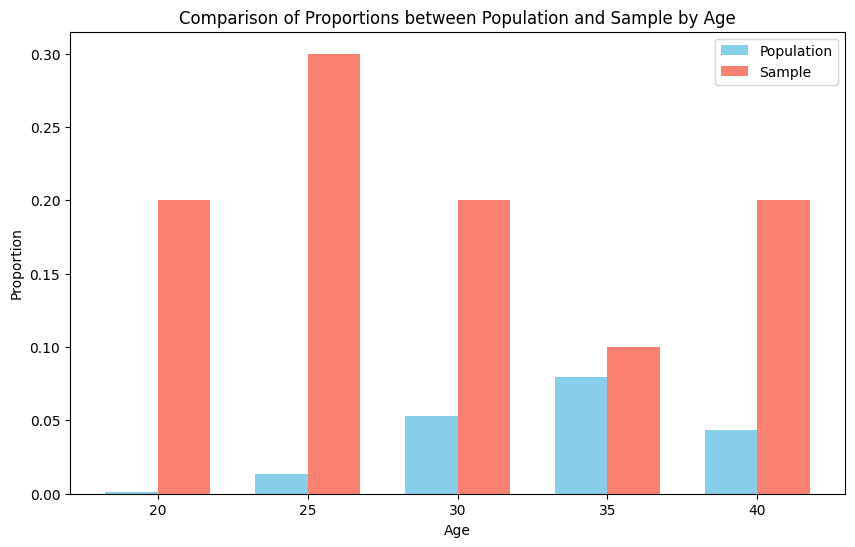

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions in the population
population_proportions = {age: len(population[population['Age'] == age]) / len(population) for age in age_stratification.keys()}

# Calculate proportions in the sample
sample_proportions = {age: len(stratified_age_sample[stratified_age_sample['Age'] == age]) / len(stratified_age_sample) for age in age_stratification.keys()}

# Ages and proportion values
ages = list(age_stratification.keys())
population_props = list(population_proportions.values())
sample_props = list(sample_proportions.values())

# Bar width
bar_width = 0.35

# Bar positions on the plot
positions = range(len(ages))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(positions, population_props, bar_width, label='Population', color='skyblue')
plt.bar([p + bar_width for p in positions], sample_props, bar_width, label='Sample', color='salmon')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Comparison of Proportions between Population and Sample by Age')
plt.xticks([p + bar_width / 2 for p in positions], ages)
plt.legend()

plt.show()

##**Amostragem Sistemática**

A amostragem sistemática é uma técnica de amostragem na qual indivíduos da população são selecionados em intervalos regulares, utilizando um processo sistemático. Este método envolve dividir a população em uma lista ordenada e selecionar cada k-ésimo elemento dessa lista, onde k é o chamado “intervalo de amostragem”.

O intervalo de amostragem, denotado por k, representa o número de elementos da população entre cada seleção. Por exemplo, se temos uma população de 1000 indivíduos e escolhemos um intervalo de amostragem de 10, selecionaremos cada 10º indivíduo para fazer parte da amostra. A população é ordenada com base em uma característica de interesse. Essa característica pode ser qualquer variável que permita atribuir uma ordem aos indivíduos na população, como um identificador único ou uma característica numérica. Após definir o intervalo de amostragem e ordenar a população, a amostra é selecionada escolhendo cada k-ésimo elemento da lista ordenada. Por exemplo, se o intervalo de amostragem for 10, serão selecionados o primeiro, o décimo primeiro, o vigésimo primeiro, e assim por diante, até que a amostra desejada seja completada.

A amostragem sistemática é frequentemente utilizada quando a população já está ordenada ou quando é difícil obter uma amostra completamente aleatória. Essa técnica é relativamente simples de implementar e pode ser eficiente quando a população é grande e a distribuição dos indivíduos é uniforme. No entanto, é importante observar que a amostragem sistemática pode levar à introdução de viés se a ordem da população seguir um padrão que não represente com precisão a variação na característica de interesse. Portanto, é aconselhável realizar uma análise crítica dos resultados obtidos por meio da amostragem sistemática.

In [ ]:
# Amostragem Sistemática
def systematic_sampling(population, n):
    k = len(population) // n  # Número de indivíduos em cada intervalo
    start = np.random.randint(0, k)  # Ponto de partida aleatório
    sampled_indices = np.arange(start, len(population), step=k)
    return population.iloc[sampled_indices]

# Exemplo de uso da amostragem sistemática para selecionar 100 indivíduos
systematic_sample = systematic_sampling(population, 100)
print("\nAmostragem Sistemática:")
print(systematic_sample)


Amostragem Sistemática:
            ID  Age  Gender  Income
6523      6524   33  Female   14857
16523    16524   32  Female   17380
26523    26524   11  Female    5204
36523    36524   34    Male    7648
46523    46524   21  Female    8278
...        ...  ...     ...     ...
956523  956524   38  Female   14109
966523  966524   35  Female    7493
976523  976524   22  Female   20032
986523  986524   40  Female   17625
996523  996524   40  Female   12888

[100 rows x 4 columns]


Observação:

O valor de 𝑘 é calculado como o número total de indivíduos na população dividido pelo número desejado de amostras 𝑛. No código, o cálculo é feito com a linha:

k = len(population) // n

Aqui, len(population) retorna o número total de indivíduos na população, e n é o número de indivíduos que você deseja na amostra.

O operador // realiza a divisão inteira, ou seja, divide o número total de indivíduos pelo número desejado de amostras e arredonda para baixo, obtendo o intervalo de amostragem.

Por exemplo, se a população tem 1000 indivíduos e você deseja selecionar 15 amostras, o valor de 𝑘 será:

𝑘 = 1000/15 ≈ 66

Então,
𝑘 será 66, indicando que cada 66º indivíduo será selecionado para a amostra, começando a partir de um ponto inicial aleatório.

**Verificando os parâmetros estatísticos descritivos da amostra:**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
systematic_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,501524.00,290114.919759,6524.0,254024.0,501524.0,749024.00,996524.0
Age,100.0,33.92,10.927382,2.0,26.0,34.5,40.25,62.0
Income,100.0,14000.77,5477.487601,5014.0,8924.5,13942.5,18099.25,23980.0


**Visualizando os histogramas juntos:**

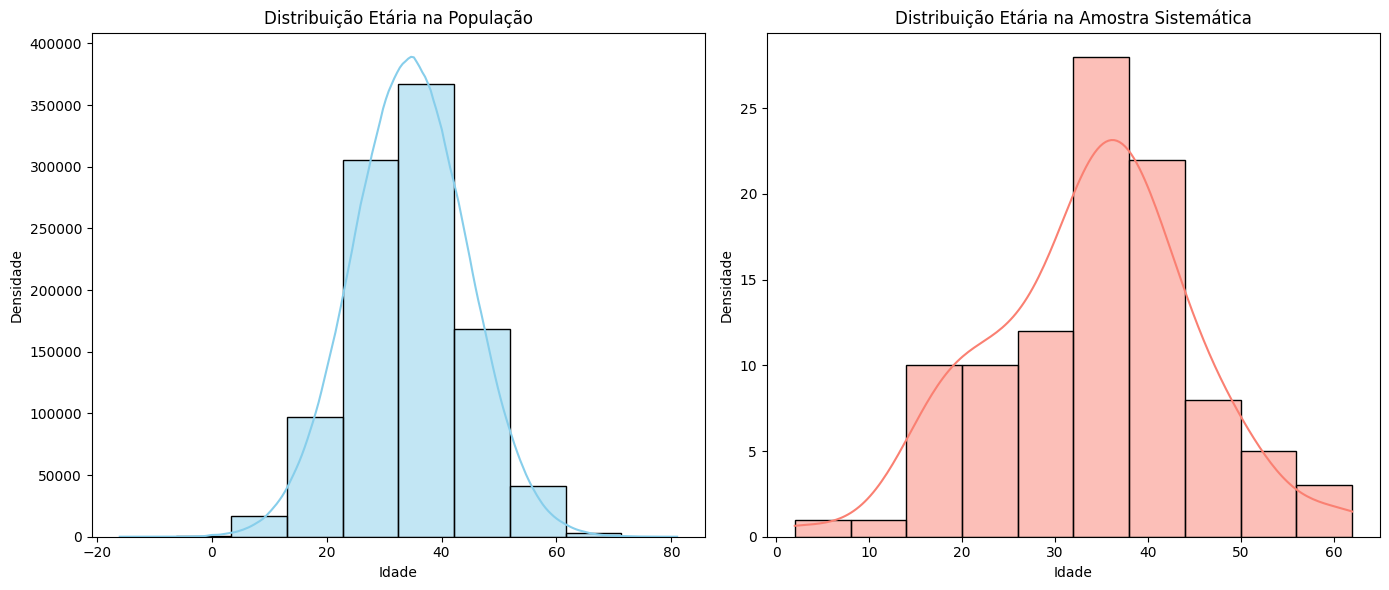

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(systematic_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostra Sistemática')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

##**Amostragem por Conglomerados**

A amostragem por conglomerados é uma técnica de amostragem na qual a população é dividida em grupos, chamados de “conglomerados”, e um subconjunto desses conglomerados é selecionado aleatoriamente para formar a amostra. Essa técnica é útil quando a população está naturalmente organizada em grupos ou conglomerados e quando não é prático ou possível selecionar individualmente os elementos da população.

Os conglomerados são grupos homogêneos de indivíduos dentro da população. Eles podem ser definidos com base em fatores geográficos, sociais ou outros que refletem a estrutura natural da população. Por exemplo, se estivermos estudando a educação primária em uma determinada área geográfica, os conglomerados poderiam ser as escolas nessa área. Após definir os conglomerados, um subconjunto deles é selecionado aleatoriamente para formar a amostra. Essa seleção é feita usando uma técnica de amostragem aleatória, como a amostragem aleatória simples ou a amostragem sistemática. Uma vez que os conglomerados são selecionados, amostragem adicional pode ser realizada dentro de cada conglomerado para selecionar indivíduos ou elementos específicos a serem incluídos na amostra. Isso pode ser feito usando outras técnicas de amostragem, como a amostragem aleatória simples ou estratificada.

A amostragem por conglomerados é particularmente útil quando a população é grande e dispersa ou quando é difícil selecionar individualmente os elementos da população. Essa técnica permite simplificar o processo de amostragem, focando na seleção de grupos representativos da população em vez de indivíduos. No entanto, é importante ter em mente que a amostragem por conglomerados pode levar a uma precisão menor em comparação com outras técnicas de amostragem, pois os indivíduos dentro de cada conglomerado podem não ser totalmente representativos da população geral. Portanto, é importante avaliar cuidadosamente os trade-offs entre eficiência e precisão ao usar essa técnica de amostragem.

In [ ]:
import numpy as np
import pandas as pd

# Função para realizar a amostragem por conglomerados
def cluster_sampling(population, n, num_clusters):
    """
    Realiza a amostragem por conglomerados na população.

    Parâmetros:
    population (DataFrame): O DataFrame que contém a população.
    n (int): O número de indivíduos desejados na amostra final.
    num_clusters (int): O número de conglomerados em que a população será dividida.

    Retorna:
    DataFrame: Uma amostra com 'n' indivíduos selecionados.
    """
    # Dividir a população em 'num_clusters' conglomerados
    clusters = np.array_split(population, num_clusters)

    # Selecionar aleatoriamente um indivíduo de cada conglomerado
    sampled_clusters = [cluster.sample(1) for cluster in clusters]

    # Concatenar os indivíduos selecionados de todos os conglomerados
    sample = pd.concat(sampled_clusters, axis=0)

    # Retornar os primeiros 'n' indivíduos da amostra
    return sample.head(n)

# Exemplo de uso da amostragem por conglomerados para selecionar 100 indivíduos
cluster_sample = cluster_sampling(population, 100, 5)

print("\nAmostragem por Conglomerados:")
print(cluster_sample)


Amostragem por Conglomerados:
            ID  Age  Gender  Income
71444    71445   38    Male    8736
361062  361063   39    Male    8214
455461  455462   32  Female    6742
656790  656791   52  Female    9519
886957  886958   25  Female    7927


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**Explicação Detalhada**

Importação das Bibliotecas:
- **numpy** e **pandas** são importados para manipulação dos dados.

Função `cluster_sampling`:

**Parâmetros:**
- **population**: O DataFrame contendo todos os indivíduos da população.
- **n**: O número de indivíduos desejados na amostra final.
- **num_clusters**: O número de conglomerados em que a população será dividida.

**Processo:**
- **`np.array_split(population, num_clusters)`**: Divide a população em `num_clusters` conglomerados.
- **`[cluster.sample(1) for cluster in clusters]`**: Seleciona aleatoriamente um indivíduo de cada conglomerado.
- **`pd.concat(sampled_clusters, axis=0)`**: Junta os indivíduos selecionados em um único DataFrame.
- **`sample.head(n)`**: Retorna os primeiros `n` indivíduos da amostra.

**Exemplo de Uso:**
- **`cluster_sample = cluster_sampling(population, 100, 5)`**: Executa a função para selecionar 100 indivíduos de 5 conglomerados.
- **`print("\nAmostragem por Conglomerados:")`**: Exibe o título da amostra.
- **`print(cluster_sample)`**: Exibe a amostra resultante.

**Verificando os parâmetros estatísticos descritivos da amostra**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
cluster_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5.0,486343.8,307544.291075,71445.0,361063.0,455462.0,656791.0,886958.0
Age,5.0,37.2,9.984989,25.0,32.0,38.0,39.0,52.0
Income,5.0,8227.6,1027.586639,6742.0,7927.0,8214.0,8736.0,9519.0


**Visualizando os histogramas juntos:**

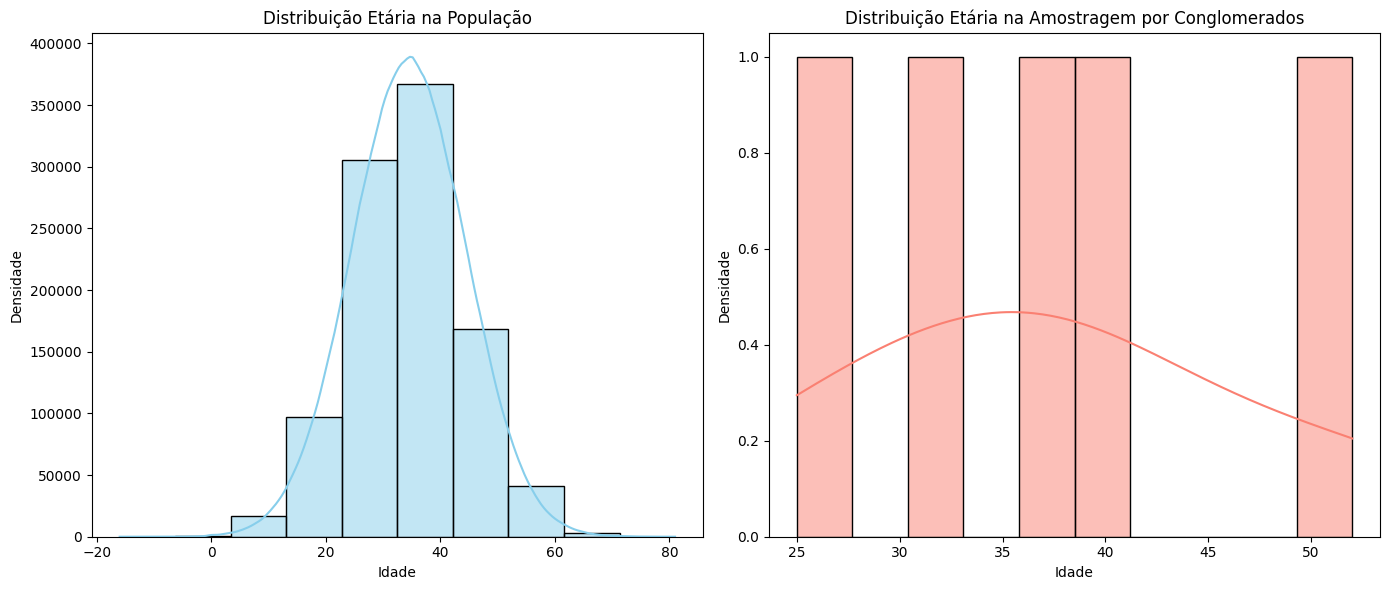

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(cluster_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conglomerados')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

##**Amostragem por Cotas**

A amostragem por cotas é uma técnica de amostragem não probabilística na qual a população é dividida em grupos, chamados de “cotas”, com base em certas características de interesse. Posteriormente, indivíduos são selecionados de cada cota até que um número predeterminado por cota seja alcançado. Este método é utilizado para garantir que a amostra reflita as proporções especificadas das características de interesse presentes na população, mas não garante a aleatoriedade na seleção dos indivíduos.

As cotas são subdivisões da população baseadas em características demográficas ou socioeconômicas específicas, como idade, gênero, nível de escolaridade, renda, etc. Essas cotas são selecionadas para refletir as proporções desejadas de cada característica dentro da população. Após definir as cotas, indivíduos são selecionados de forma não aleatória de cada cota até que o número predeterminado de indivíduos por cota seja alcançado. A seleção dos indivíduos pode ser feita de várias maneiras, por exemplo, usando listas de contato, entrevistas de rua ou chamadas telefônicas. Uma vez que os indivíduos são selecionados de cada cota, eles são combinados para formar a amostra geral. Como os indivíduos foram selecionados de cada cota para garantir que a amostra reflita as proporções desejadas das características de interesse, espera-se que a amostra seja representativa da população geral.

A amostragem por cotas é frequentemente usada quando não é possível utilizar técnicas de amostragem probabilística, como a amostragem aleatória simples, e quando é necessário garantir que a amostra reflita certas características da população. No entanto, é importante observar que a amostragem por cotas pode introduzir viés se as cotas não forem cuidadosamente selecionadas ou se a seleção de indivíduos dentro de cada cota não for aleatória. Portanto, é crucial prestar atenção ao design e à implementação da amostragem por cotas para garantir a representatividade e a confiabilidade da amostra resultante.

In [ ]:
# Amostragem por Cotas
def quota_sampling(population, quotas):
    """
    Realiza a amostragem por cotas da população.

    Parâmetros:
    population (DataFrame): O DataFrame que contém todos os indivíduos da população.
    quotas (dict): Um dicionário onde as chaves são atributos (colunas) e os valores são os critérios para as cotas.

    Exemplo de dicionário de cotas:
    {'Gender': 'Male', 'Age': 30}

    Retorna:
    DataFrame: Uma amostra contendo indivíduos que atendem às cotas especificadas.
    """
    # Cria um DataFrame vazio para armazenar a amostra
    sample = pd.DataFrame()

    # Itera sobre cada atributo e valor especificado nas cotas
    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        # Seleciona aleatoriamente 50% dos casos do subconjunto para a amostra de maneira a atender o critério estabelecido
        # Note que `frac=0.5` indica a seleção de 50% dos casos
        sample = pd.concat([sample, subset.sample(frac=0.5)])

    return sample

# Exemplo de uso da amostragem por cotas para selecionar indivíduos
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas (critério)
quota_sample = quota_sampling(population, selected_quotas)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age  Gender  Income
847756  847757   41    Male    6657
350714  350715   29    Male   16804
540967  540968   17    Male   22139
491774  491775   43    Male   16560
505283  505284   34    Male   23002
...        ...  ...     ...     ...
748944  748945   30  Female   24857
182059  182060   30    Male   15446
135410  135411   30    Male   21839
206122  206123   30    Male   15303
603343  603344   30    Male   16533

[268425 rows x 4 columns]


**Explicação Detalhada**

**Função `quota_sampling`:**
- **Parâmetros**:
  - **`population`**: O DataFrame que contém todos os indivíduos da população.
  - **`quotas`**: Um dicionário onde as chaves são atributos (colunas) e os valores são os critérios para as cotas.
    
    **Exemplo de dicionário de cotas:**
    ```python
    {'Gender': 'Male', 'Age': 30}
    ```

- **Processo**:
  - **`sample = pd.DataFrame()`**: Cria um DataFrame vazio para armazenar a amostra resultante.
  - **`for attribute, value in quotas.items()`**: Itera sobre cada atributo e valor especificado nas cotas.
  - **`subset = population[population[attribute] == value]`**: Filtra a população para obter o subconjunto que atende à cota atual.
  - **`sample = pd.concat([sample, subset.sample(frac=0.5)])`**: Seleciona aleatoriamente 50% dos casos do subconjunto e adiciona à amostra final. A seleção é baseada no critério de cotas fornecido.
    
- **Retorno**:
  - **`sample`**: O DataFrame resultante contendo indivíduos que atendem às cotas especificadas.

**Exemplo de Uso:**
- **`selected_quotas = {'Gender': 'Male', 'Age': 30}`**: Define as cotas para selecionar indivíduos do gênero masculino com 30 anos.
- **`quota_sample = quota_sampling(population, selected_quotas)`**: Executa a função `quota_sampling` para obter a amostra com base nas cotas especificadas.
- **`print("\nAmostragem por Cotas:")`**: Exibe o título da amostra.
- **`print(quota_sample)`**: Exibe a amostra resultante, que contém indivíduos que atendem às cotas definidas.








**Verificando os parâmetros estatísticos descritivos da amostra**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,268425.0,499539.624595,288580.180563,27.0,249497.0,499929.0,749396.0,999998.0
Age,268425.0,34.206378,9.691858,-16.0,28.0,34.0,41.0,79.0
Income,268425.0,14995.133356,5777.457959,5000.0,9994.0,14987.0,20005.0,24999.0


**Visualizando os histogramas juntos**

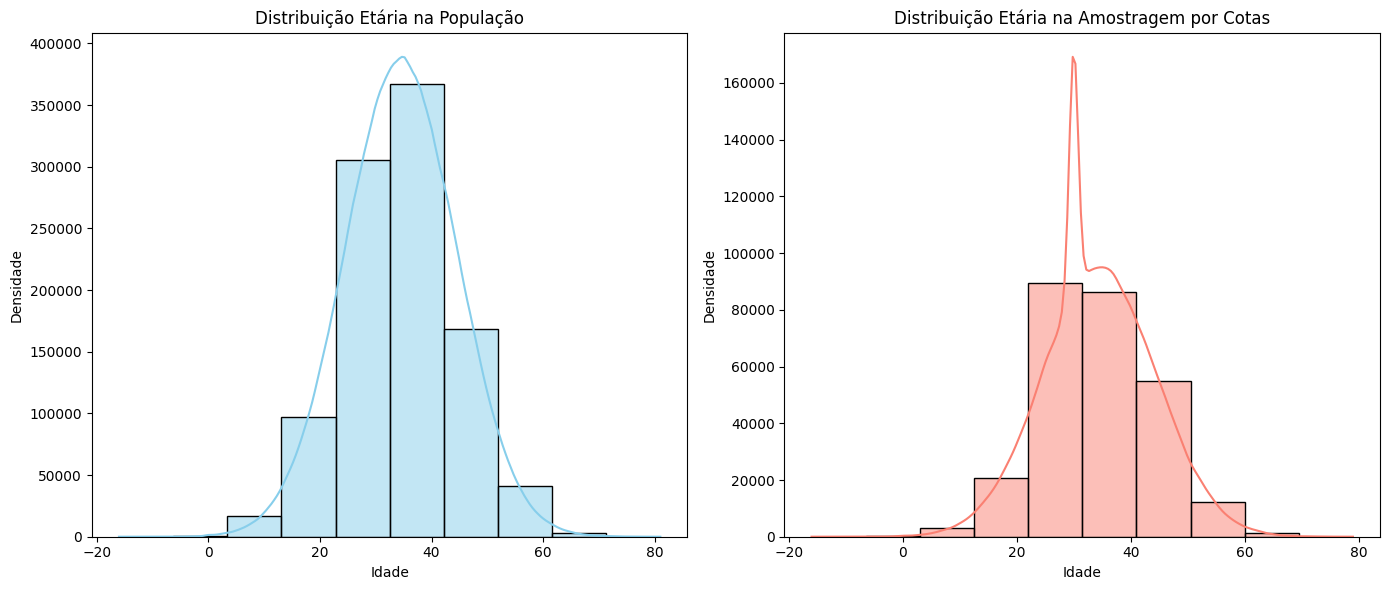

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Limitando a quantidade de amostra**

In [ ]:
import pandas as pd

def quota_sampling(population, quotas, frac=0.5, max_sample_size=100):
    """
    Realiza a amostragem por cotas da população com um limite máximo de indivíduos na amostra e uma fração especificada.

    Parâmetros:
    population (DataFrame): O DataFrame que contém todos os indivíduos da população.
    quotas (dict): Um dicionário onde as chaves são atributos (colunas) e os valores são os critérios para as cotas.
    frac (float): A fração de indivíduos a ser amostrada de cada subconjunto. (0 < frac <= 1)
    max_sample_size (int): O tamanho máximo desejado para a amostra.

    Exemplo de dicionário de cotas:
    {'Gender': 'Male', 'Age': 30}

    Retorna:
    DataFrame: Uma amostra contendo até 'max_sample_size' indivíduos que atendem às cotas especificadas.
    """
    sample = pd.DataFrame()  # Cria um DataFrame vazio para armazenar a amostra

    for attribute, value in quotas.items():
        # Filtra a população para obter o subconjunto que atende à cota atual
        subset = population[population[attribute] == value]

        if not subset.empty:
            # Seleciona uma fração dos casos do subconjunto, respeitando a fração especificada
            sample = pd.concat([sample, subset.sample(frac=frac)])

    # Remove duplicatas para garantir que cada indivíduo apareça apenas uma vez
    sample = sample.drop_duplicates()

    # Limita a amostra ao tamanho máximo especificado
    if len(sample) > max_sample_size:
        sample = sample.sample(n=max_sample_size)

    return sample

# Exemplo de uso da amostragem por cotas para selecionar até 100 indivíduos, com uma fração de 50%
selected_quotas = {'Gender': 'Male', 'Age': 30}  # Exemplo de cotas selecionadas
quota_sample = quota_sampling(population, selected_quotas, frac=0.5, max_sample_size=100)

print("\nAmostragem por Cotas:")
print(quota_sample)


Amostragem por Cotas:
            ID  Age Gender  Income
873893  873894   26   Male   19655
724367  724368   29   Male   12367
932945  932946   29   Male   13841
992418  992419   35   Male    6241
520735  520736   30   Male    8905
...        ...  ...    ...     ...
410889  410890   33   Male   16594
88499    88500   22   Male    8775
866085  866086   23   Male    9799
123260  123261   27   Male    9437
791776  791777   45   Male   15668

[100 rows x 4 columns]


**Verificando os parâmetros estatísticos descritivos da amostra**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
quota_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,525037.21,313226.090538,2883.0,253901.25,523930.0,801222.5,998200.0
Age,100.0,33.21,9.897755,11.0,27.00,30.5,40.0,73.0
Income,100.0,14351.78,5725.465408,5127.0,9414.25,14363.5,19046.0,24476.0


**Visualizando os histogramas juntos**

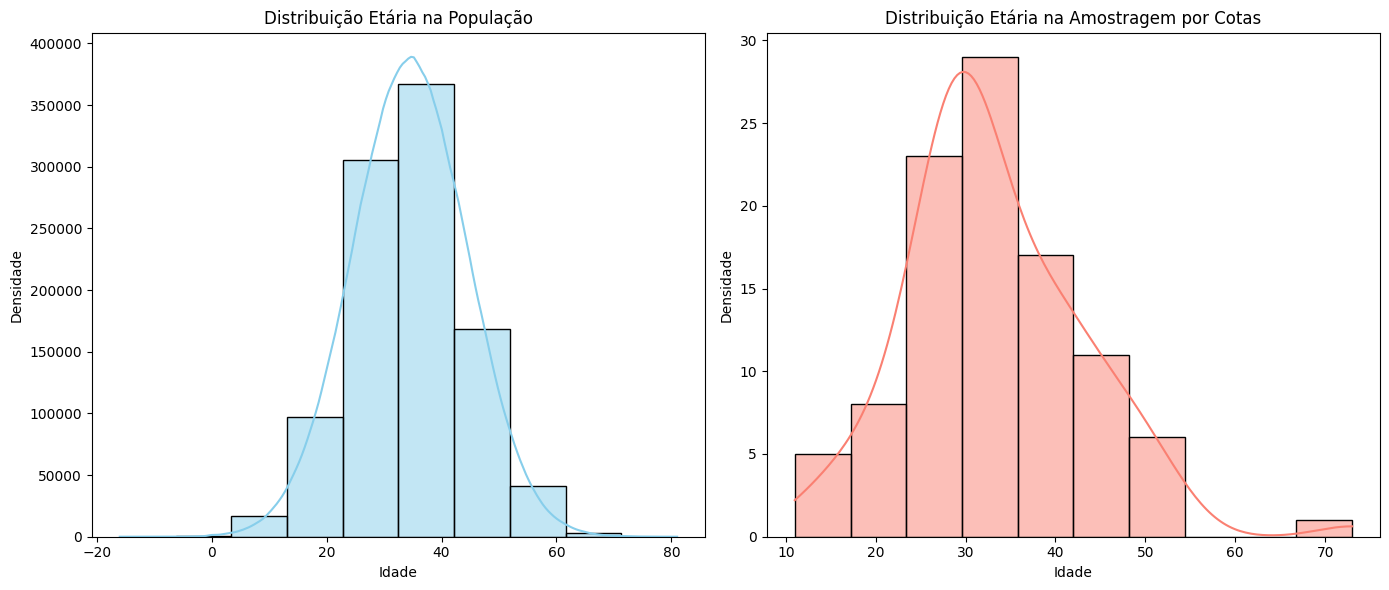

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(quota_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Cotas')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

##**Amostragem Oportuna ou por Conveniência**

A amostragem oportuna, também conhecida como amostragem por conveniência, é uma técnica de amostragem não probabilística na qual os indivíduos são selecionados com base em sua disponibilidade e acessibilidade. Nesse tipo de amostragem, não há preocupação em garantir uma representação aleatória ou estatística da população; em vez disso, são selecionados indivíduos que são facilmente acessíveis ou disponíveis para o estudo.

Os indivíduos são selecionados com base em sua disponibilidade e acessibilidade para o pesquisador ou organização que está conduzindo o estudo. Isso pode incluir pessoas que são fáceis de contatar, alcançar ou envolver no processo de pesquisa. Como a seleção dos indivíduos ocorre com base em sua disponibilidade e acessibilidade, a amostragem oportuna não segue um processo aleatório. Como resultado, os resultados obtidos com esse tipo de amostragem podem não ser representativos da população maior. A amostragem oportuna é frequentemente usada quando é difícil ou caro realizar uma amostragem aleatória ou quando não é possível obter uma amostra representativa da população. Esta técnica é comum em situações onde os pesquisadores têm acesso apenas a uma pequena parte da população ou ao estudar grupos específicos de indivíduos dentro de uma população maior.

A amostragem oportuna pode ser útil quando você deseja obter informações preliminares sobre um tópico ou quando deseja explorar rapidamente um fenômeno sem se engajar em uma amostragem mais rigorosa. No entanto, é importante observar que os resultados obtidos com esse tipo de amostragem podem ser influenciados por variáveis incontroláveis e podem não ser generalizáveis para a população mais ampla. Portanto, é crucial interpretar os resultados da amostragem oportuna com cautela e considerar suas limitações no contexto da análise realizada.

In [ ]:
# Amostragem por Conveniência
def convenience_sampling(population, n):
    """
    Realiza a amostragem por conveniência da população.

    Parâmetros:
    population (DataFrame): O DataFrame que contém todos os indivíduos da população.
    n (int): O número de indivíduos desejados na amostra final.

    Retorna:
    DataFrame: Uma amostra com 'n' indivíduos selecionados de forma conveniente.
    """
    # Seleciona aleatoriamente 'n' indivíduos da população
    return population.sample(n)

# Exemplo de uso da amostragem por conveniência para selecionar 100 indivíduos
convenience_sample = convenience_sampling(population, 100)

print("\nAmostragem por Conveniência:")
print(convenience_sample)


Amostragem por Conveniência:
            ID  Age  Gender  Income
650394  650395   34    Male    5167
500375  500376   37    Male   10985
193020  193021   44  Female    6821
736266  736267   46    Male    8680
923946  923947   41    Male   16630
...        ...  ...     ...     ...
539454  539455   58    Male   11151
906303  906304   30    Male   23174
196050  196051   26    Male   20375
72875    72876   18    Male   23848
815452  815453   35  Female   16203

[100 rows x 4 columns]


**Explicação Detalhada**

**Função `convenience_sampling`:**
- **Parâmetros**:
  - **`population`**: O DataFrame que contém todos os indivíduos da população.
  - **`n`**: O número de indivíduos que desejamos na amostra.

- **Processo**:
  - **`population.sample(n)`**: Seleciona aleatoriamente `n` indivíduos da população. A seleção é feita de forma conveniente, ou seja, sem levar em conta a aleatoriedade rigorosa ou representatividade estatística.

**Exemplo de Uso:**
- **`convenience_sample = convenience_sampling(population, 12)`**: Executa a função `convenience_sampling` para selecionar uma amostra de 12 indivíduos da população.
- **`print("\nAmostragem por Conveniência:")`**: Exibe o título da amostra.
- **`print(convenience_sample)`**: Exibe a amostra resultante, que contém 12 indivíduos selecionados aleatoriamente da população.

**Verificando os parâmetros estatísticos descritivos da amostra**

In [ ]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
Age,1000000.0,34.508167,9.998850,-16.0,28.00,35.0,41.00,81.0
Income,1000000.0,14998.017901,5772.960354,5000.0,9995.00,14998.0,19999.00,24999.0


In [ ]:
convenience_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,537471.46,280807.836808,859.0,285793.0,558711.0,756473.5,978434.0
Age,100.0,34.89,9.235302,8.0,29.0,35.0,41.0,58.0
Income,100.0,15880.33,5687.735746,5013.0,11113.5,16626.5,20297.0,24878.0


**Visualizando os histogramas juntos:**

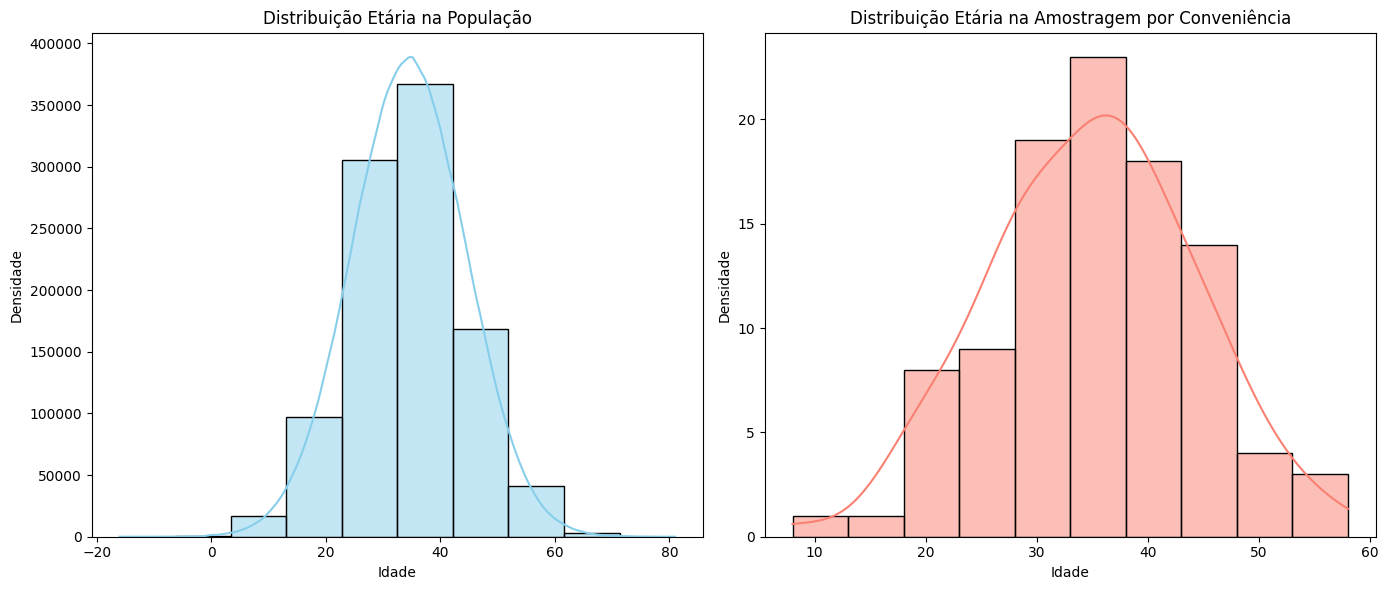

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(convenience_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

**Tarefa:**

In [ ]:
import pandas as pd
import numpy as np

# Dataset, coluna 'Gender' com os valores 'Male' para homens e 'Female' para mulheres


# Contagem de homens e mulheres no dataset original
total_male = len(population[population['Gender'] == 'Male'])
total_female = len(population[population['Gender'] == 'Female'])

# Definindo o tamanho da amostra
sample_size = 100

# Calculando a proporção de homens e mulheres na amostra
male_sample_size = int((total_male / len(population)) * sample_size)
female_sample_size = sample_size - male_sample_size

# Realizando a amostragem aleatória mantendo a proporção
male_sample = population[population['Gender'] == 'Male'].sample(n=male_sample_size, random_state=42)
female_sample = population[population['Gender'] == 'Female'].sample(n=female_sample_size, random_state=42)

# Concatenando as amostras
final_sample = pd.concat([male_sample, female_sample])

# Embaralhando os dados para misturar homens e mulheres
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_sample)

        ID  Age  Gender  Income
0   748017   27  Female   24799
1   894016   36  Female   24070
2   646920   38  Female   11398
3   904527   38    Male   21458
4   249962   36    Male   11067
..     ...  ...     ...     ...
95  368036   24  Female   14605
96  646201   39  Female   10532
97  133138   31    Male    7195
98  322403   35  Female   10303
99  256950   39  Female   12846

[100 rows x 4 columns]


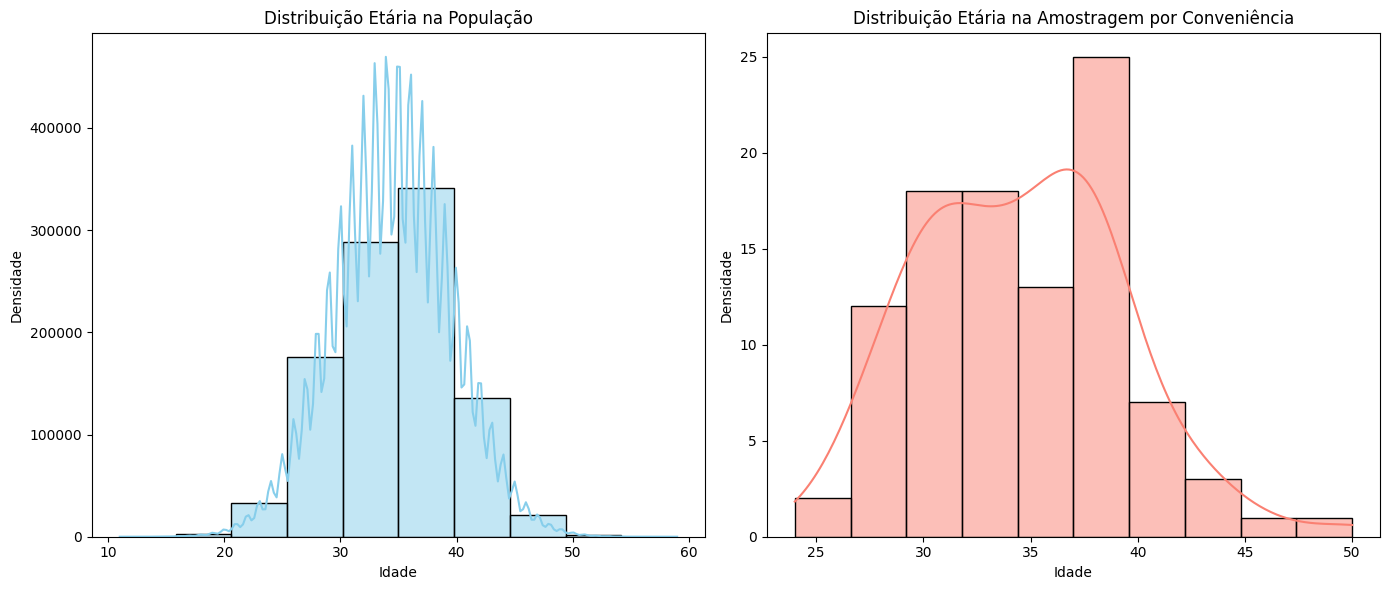

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subgráficos
plt.figure(figsize=(14, 6))

# Primeiro gráfico: Distribuição etária na população
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do gráfico)
sns.histplot(population['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição Etária na População')
plt.xlabel('Idade')
plt.ylabel('Densidade')

# Segundo gráfico: Distribuição etária na amostra sistemática
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do gráfico)
sns.histplot(final_sample['Age'], bins=10, kde=True, color='salmon')
plt.title('Distribuição Etária na Amostragem por Conveniência')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()